In [1]:
import gym
from dqn_agent import DQN_Agent
from agent_handler import Agent_handler
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

2023-11-16 21:21:52.243448: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


crop </br>
increase contrast </br>
skip inital frames </br>

In [2]:
def describe_env(env: gym.Env):
    num_actions = env.action_space.n
    obs = env.observation_space
    num_obs = env.observation_space.shape

    print("Observation space: ", obs)
    print("Observation space size: ", num_obs)
    print("Number of actions: ", num_actions)

    return num_obs, num_actions

In [3]:
def plot(results, result_index, window_size, title):
  plt.figure(figsize=(25, 10))

  for result in results:
      sns.lineplot(np.convolve(result[result_index], np.ones(window_size) / window_size, mode='same'), label=f"(LR, EF) {(result[3]) }")
      
  plt.title(title)
  plt.legend()
  plt.show()

In [13]:

env = gym.make('MsPacman-v4', render_mode='human')

num_obs, num_actions = describe_env(env)

Observation space:  Box(0, 255, (210, 160, 3), uint8)
Observation space size:  (210, 160, 3)
Number of actions:  9


In [14]:
num_obs[0]

210

In [15]:

dqn_agent = DQN_Agent({
  "num_obs": num_obs,
  "num_actions": num_actions,
  "learning_rate": 0.01,
  "discount_factor": 0.9,
  "exploration_factor": 0.2
})

In [18]:
handler = Agent_handler({
    "num_episodes":5,
    "max_steps":10000,
    "notify_percent":5,
    "update_rate": 10
})

In [19]:
results = handler.train([dqn_agent], env)

~~~ Training Agent 1 1/1 ~~~
	Episode 0/5 0%
End of episode, n_steps: 808
	Episode 1/5 20%
End of episode, n_steps: 860
	Episode 2/5 40%
End of episode, n_steps: 838
	Episode 3/5 60%
End of episode, n_steps: 853
	Episode 4/5 80%
End of episode, n_steps: 950
	Episode 5/5 100%

Done training!




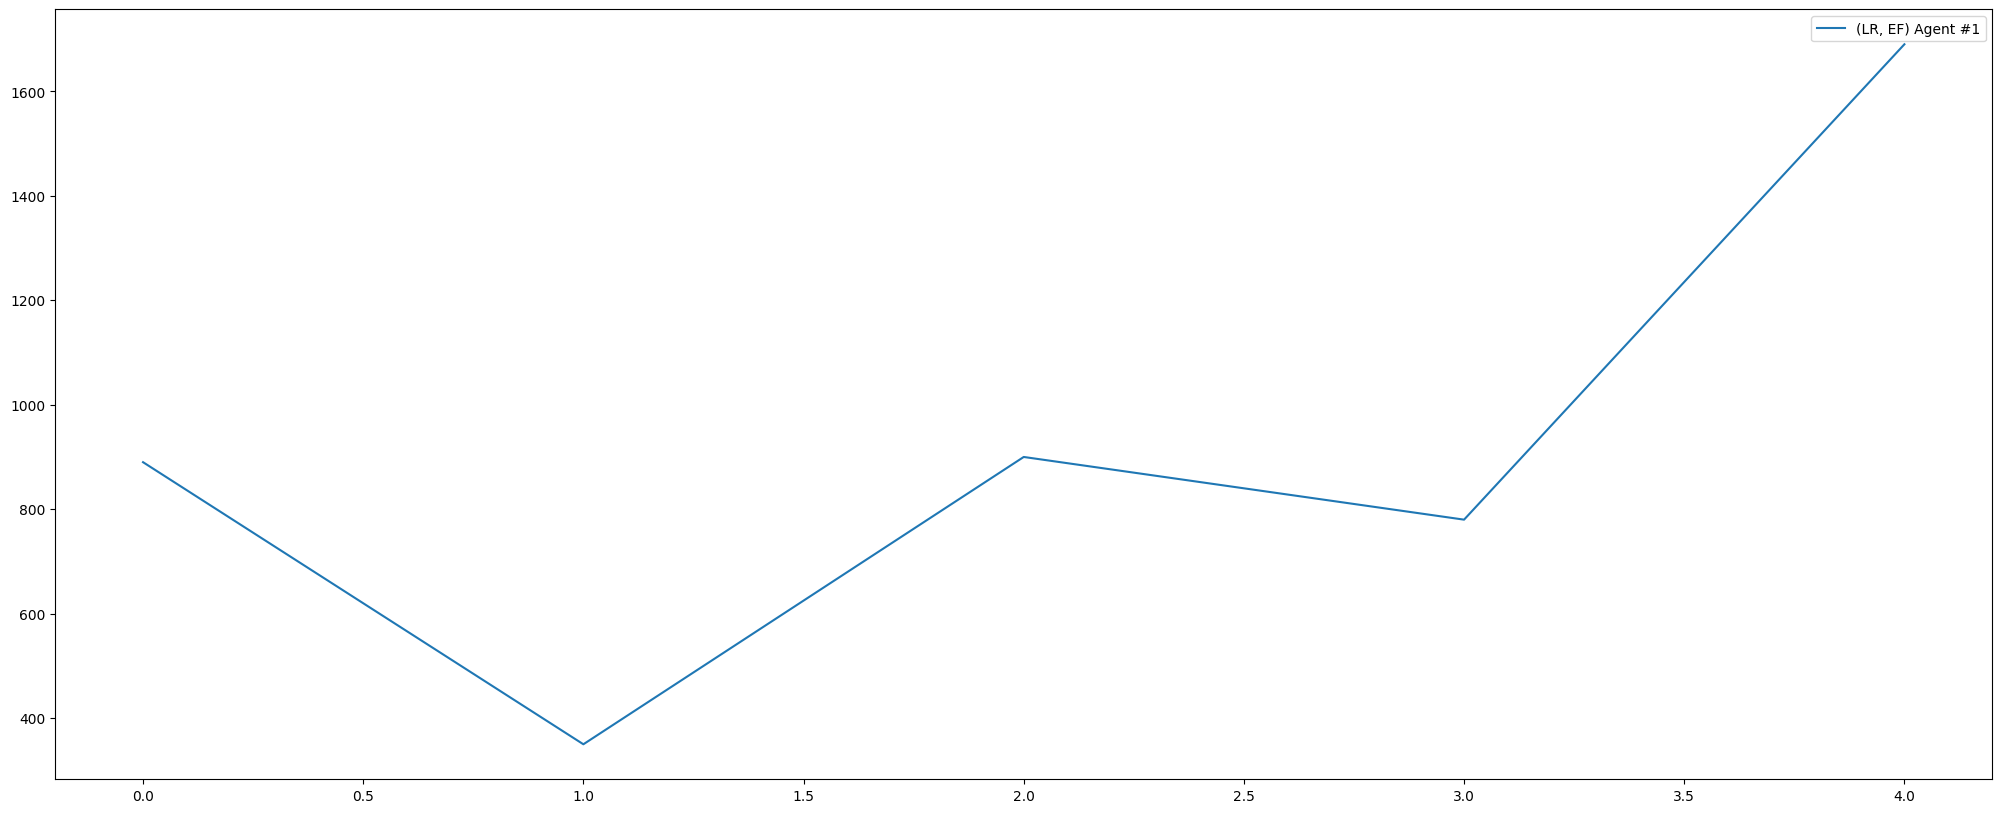

In [22]:
smoothing = 1
plot(results, 2, smoothing, "")